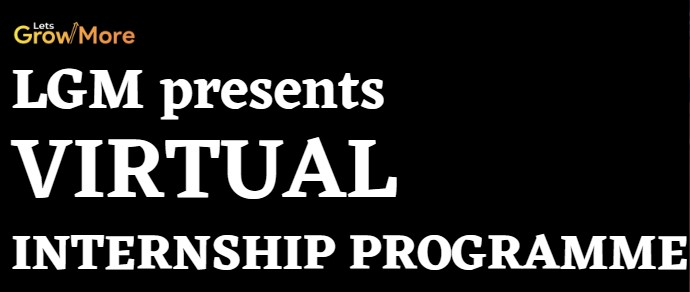

# **Task-1 : Exploratory Data Analysis on Dataset - Terrorism(Intermediate Level Task)**
As a security/ defense analyst,try to find out the hot zone of terrorism.
You can choose any of the tool of your choice(Python/r/Tableau/PowerBI/Excel/SAP/SAS)

***Dataset used link*** : https://bit.ly/2TK5Xn5

## A look into dataset

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
#to ignore the irrelevant warnings
import warnings
warnings.filterwarnings('ignore')

In [17]:
#reading the data
terrorism = pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

In [18]:
terrorism.head(15)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,197001020002,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,197001020003,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,197001030001,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


In [19]:
terrorism.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

we have 135 columns , so we'll just select few columns which seems to be important

In [20]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [21]:
#let's Generate descriptive statistics.
#Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.
#Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types
terrorism.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
terrorism=terrorism[['iyear','imonth','iday','country_txt','provstate','region_txt','city','latitude','longitude','attacktype1_txt','target1','nkill','nwound','summary','gname','targtype1_txt','weaptype1_txt','motive']]

In [23]:
#let's check if we got some null values or not
terrorism.isnull().sum()

iyear                   0
imonth                  0
iday                    0
country_txt             0
provstate             421
region_txt              0
city                  434
latitude             4556
longitude            4557
attacktype1_txt         0
target1               636
nkill               10313
nwound              16311
summary             66129
gname                   0
targtype1_txt           0
weaptype1_txt           0
motive             131130
dtype: int64

In [24]:
#looks like we got some null values in provstate,city,latitude,longitude,target1,nkill,nwound,summary,motive so we remove them
terrorism.dropna(axis=0, inplace=True)

In [25]:
terrorism.isnull().sum()

iyear              0
imonth             0
iday               0
country_txt        0
provstate          0
region_txt         0
city               0
latitude           0
longitude          0
attacktype1_txt    0
target1            0
nkill              0
nwound             0
summary            0
gname              0
targtype1_txt      0
weaptype1_txt      0
motive             0
dtype: int64

## Visualisation of data

In [30]:
print("Country with the most attacks:",terrorism['country_txt'].value_counts().idxmax())
print("City with the most attacks:",terrorism['city'].value_counts().idxmax())
print("Region with the most attacks:",terrorism['region_txt'].value_counts().idxmax())
print("Year with the most attacks:",terrorism['iyear'].value_counts().idxmax())
print("Month with the most attacks:",terrorism['imonth'].value_counts().idxmax())
print("Group with the most attacks:",terrorism['gname'].value_counts().index[1])
print("Most Attack Types:",terrorism['attacktype1_txt'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: South Asia
Year with the most attacks: 2011
Month with the most attacks: 7
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


year wise terror attacks in increasing order

In [31]:
terrorism['iyear'].value_counts(dropna = False).sort_index()

1970     222
1971     111
1972      40
1973      25
1974      40
1975      26
1976      30
1977      18
1978      41
1979      13
1980      23
1981      22
1982      27
1983      20
1984      46
1985      26
1986      37
1987      27
1988      28
1989      29
1990      27
1991      28
1992      28
1994      34
1995      25
1996      13
1997      20
1998     759
1999    1231
2000    1597
2001    1771
2002    1223
2003    1139
2004    1012
2005    1781
2006    2424
2007    2881
2008    4341
2009    4447
2010    4722
2011    4876
2012    1890
2013    2387
2014    1898
2015    1788
2016    1693
2017    1670
Name: iyear, dtype: int64

lets visualise yearly count of the attacks

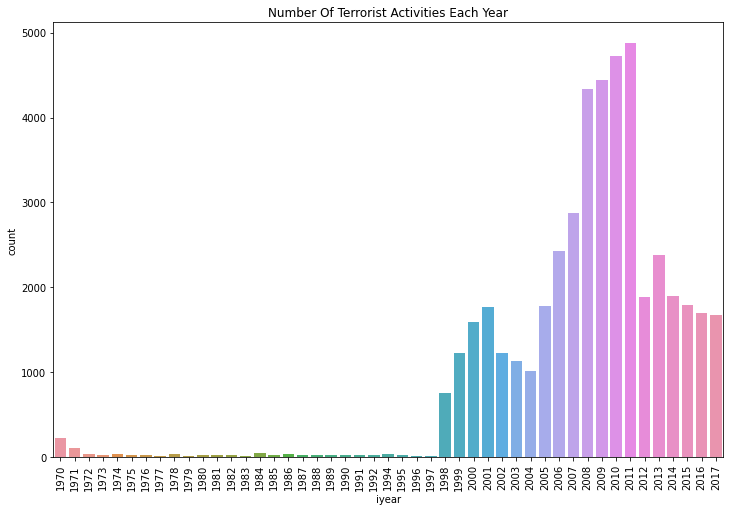

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(x="iyear", data=terrorism)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

we can see clearly that 2011 has most attacks compared to others

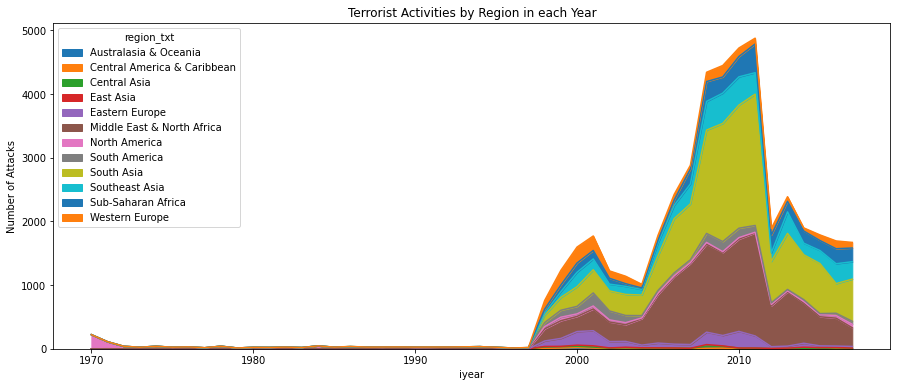

In [33]:
pd.crosstab(terrorism.iyear, terrorism.region_txt).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

This is Terrorist Activities by Region in each Year

In [35]:
terrorism['nwound'] = terrorism['nwound'].fillna(0).astype(int)
terrorism['nkill'] = terrorism['nkill'].fillna(0).astype(int)
terrorism['casualities'] = terrorism['nkill'] + terrorism['nwound']

Values are sorted by the top 50 worst terror attacks as to keep the heatmap simple and easy to visualize

In [36]:
terror1 = terrorism.sort_values(by='casualities',ascending=False)[:50]

In [37]:
heat=terror1.pivot_table(index='country_txt',columns='iyear',values='casualities')
heat.fillna(0,inplace=True)
heat.head(20)

iyear,1998,1999,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2012,2013,2014,2015,2016,2017
country_txt,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,313.0,330.0
Angola,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,405.0
Bangladesh,0.0,0.0,0.0,317.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chad,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,1161.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Egypt,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,438.0
France,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,310.0,520.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1005.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Iran,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.00,331.0,0.0,0.0,0.0,0.0,0.0,0.0
Iraq,0.0,0.0,0.0,0.0,300.0,343.00,702.0,387.0,556.571429,0.0,460.75,0.0,0.0,0.0,670.0,0.0,474.5,0.0


In [44]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go
colorscale = [[0, '#edf8fb'], [.3, '#A52A2A'],  [.6,'#76EE00'],  [1, '#008B8B']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 50 Worst Terror Attacks in History from 1998 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Top Countries affected by terror attacks

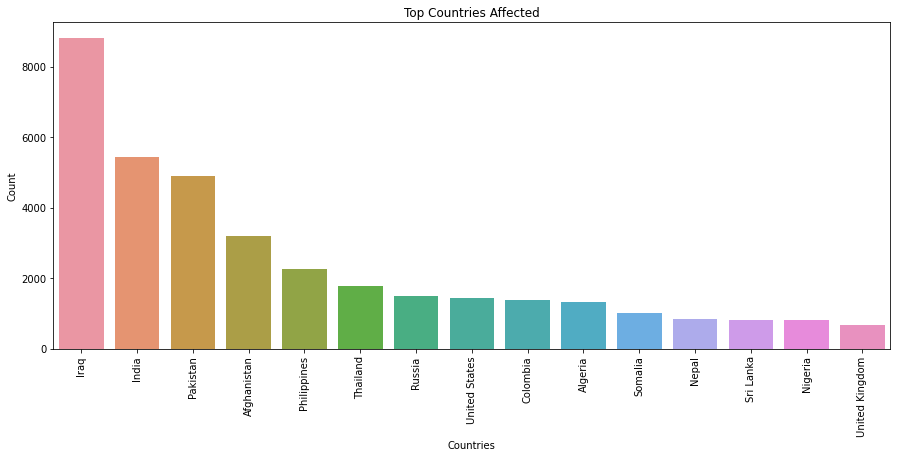

In [45]:
plt.subplots(figsize=(15,6))
sns.barplot(terrorism['country_txt'].value_counts()[:15].index,terrorism['country_txt'].value_counts()[:15].values)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

yearly casualities

In [49]:
import plotly.express as px
year_cas = terrorism.groupby('iyear').casualities.sum().to_frame().reset_index()
year_cas.columns = ['iyear','casualities']
fig=px.bar(data_frame=year_cas,x = 'iyear',y = 'casualities',color='casualities')
fig.show(renderer="colab")

it is observed that in between 2005-2010 we have highest casualities

In [51]:
from collections import Counter
target = list(terrorism['attacktype1_txt'])
target_map = dict(Counter(target))
target_df = pd.DataFrame(target_map.items())
target_df.columns = ['attacktype1_txt','Count']
fig=px.bar(data_frame=target_df,x = 'attacktype1_txt',y = 'Count',color='attacktype1_txt')
fig.show(renderer="colab")

In [52]:
killData = terrorism.loc[:,'nkill']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 112679


In [53]:
# Let's look at what types of attacks these deaths were made of.
attackData = terrorism.loc[:,'attacktype1_txt']
# attackData
typeKillData = pd.concat([attackData, killData], axis=1)
typeKillData.head()

,attacktype1_txt,nkill
5,Armed Assault,0
8,Facility/Infrastructure Attack,0
9,Facility/Infrastructure Attack,0
11,Facility/Infrastructure Attack,0
14,Facility/Infrastructure Attack,0


In [54]:
typeKillFormatData = typeKillData.pivot_table(columns='attacktype1_txt', values='nkill', aggfunc='sum')
typeKillFormatData

attacktype1_txt,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
nkill,31619,4419,59600,652,3147,2007,7055,474,3706


In [55]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, nkill to nkill
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Armed Assault                        1 non-null      int64
 1   Assassination                        1 non-null      int64
 2   Bombing/Explosion                    1 non-null      int64
 3   Facility/Infrastructure Attack       1 non-null      int64
 4   Hijacking                            1 non-null      int64
 5   Hostage Taking (Barricade Incident)  1 non-null      int64
 6   Hostage Taking (Kidnapping)          1 non-null      int64
 7   Unarmed Assault                      1 non-null      int64
 8   Unknown                              1 non-null      int64
dtypes: int64(9)
memory usage: 188.0+ bytes


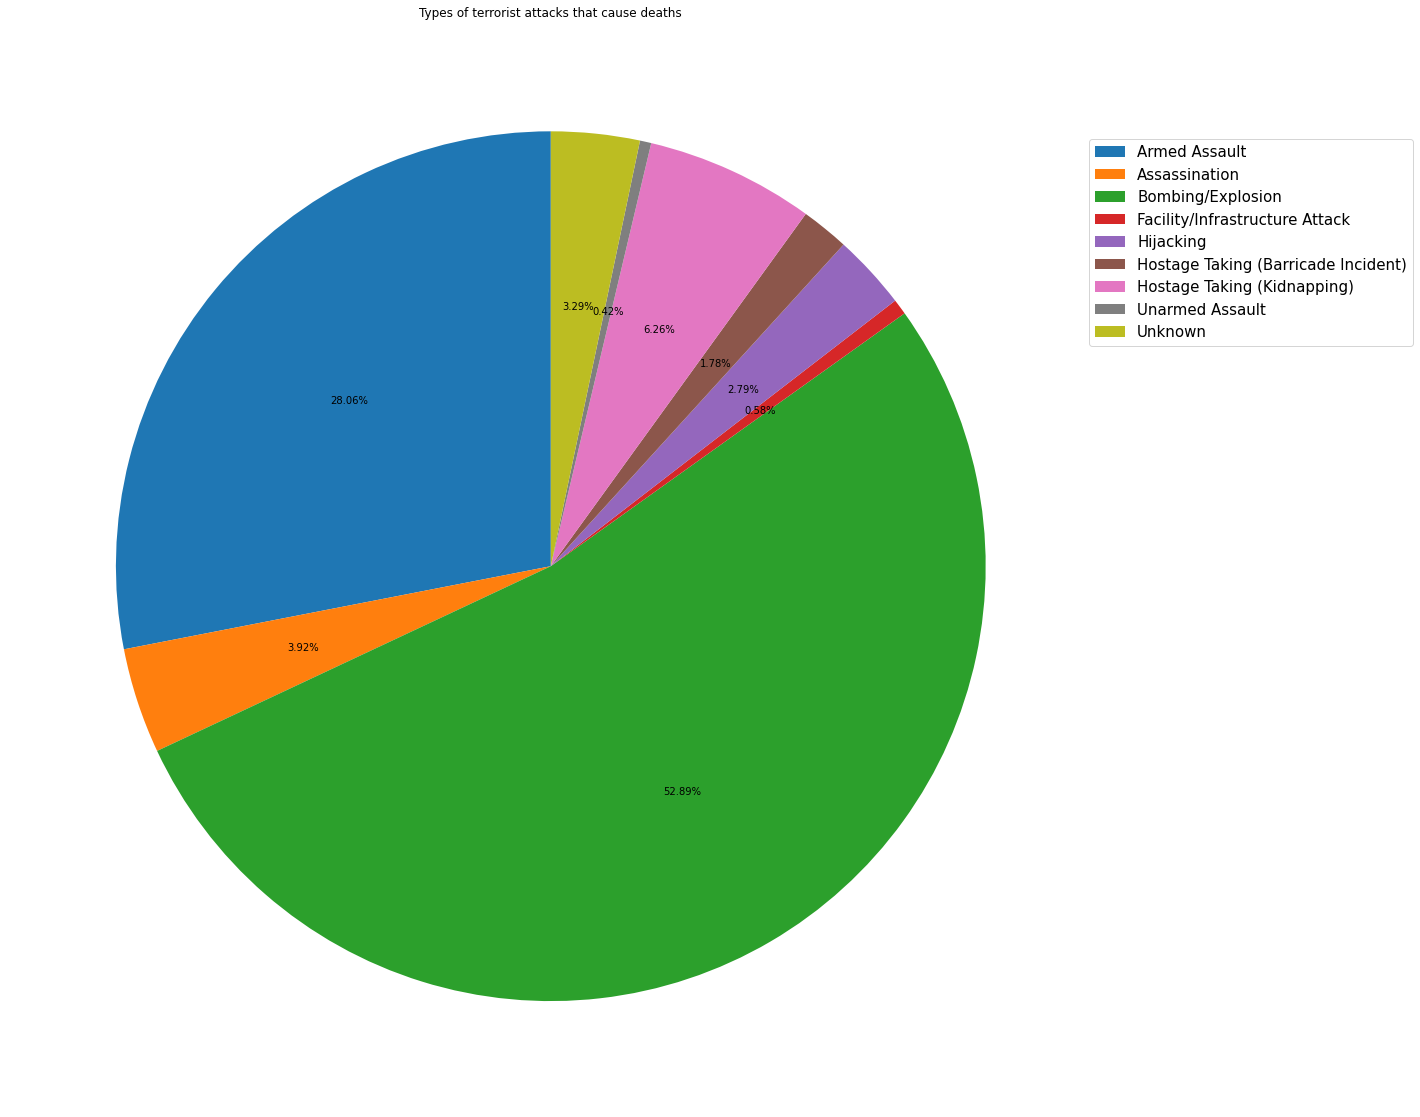

In [56]:
labels = typeKillFormatData.columns.tolist() # convert line to list
transpoze = typeKillFormatData.T # transpoze
values = transpoze.values.tolist()
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw=dict(aspect="equal"))
plt.pie(values, startangle=90, autopct='%.2f%%')
plt.title('Types of terrorist attacks that cause deaths')
plt.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15) # location legend
plt.show()

Armed assault and bombing/explosion are seen to be the cause of 80.95% of the deaths in these attacks. This rate is why these attacks are used so many times in terrorist actions. This is how dangerous weapons and explosives are to the world.

Number of people killed in terrorist attacks by countries

In [57]:
#Number of Killed in Terrorist Attacks by Countries
countryData = terrorism.loc[:,'country_txt']
# countyData
countryKillData = pd.concat([countryData, killData], axis=1)

In [59]:
countryKillFormatData = countryKillData.pivot_table(columns='country_txt', values='nkill', aggfunc='sum')
countryKillFormatData

country_txt,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,...,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza Strip,Western Sahara,Yemen,Yugoslavia,Zambia,Zimbabwe
nkill,9394,6,3983,809,0,8,5,3,30,7,...,1,68,16,0,673,0,1893,80,1,18


In [60]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

In [68]:
count_countries=countryKillFormatData.columns.tolist()
len(count_countries)

164

total 164 countries are to be plotted here

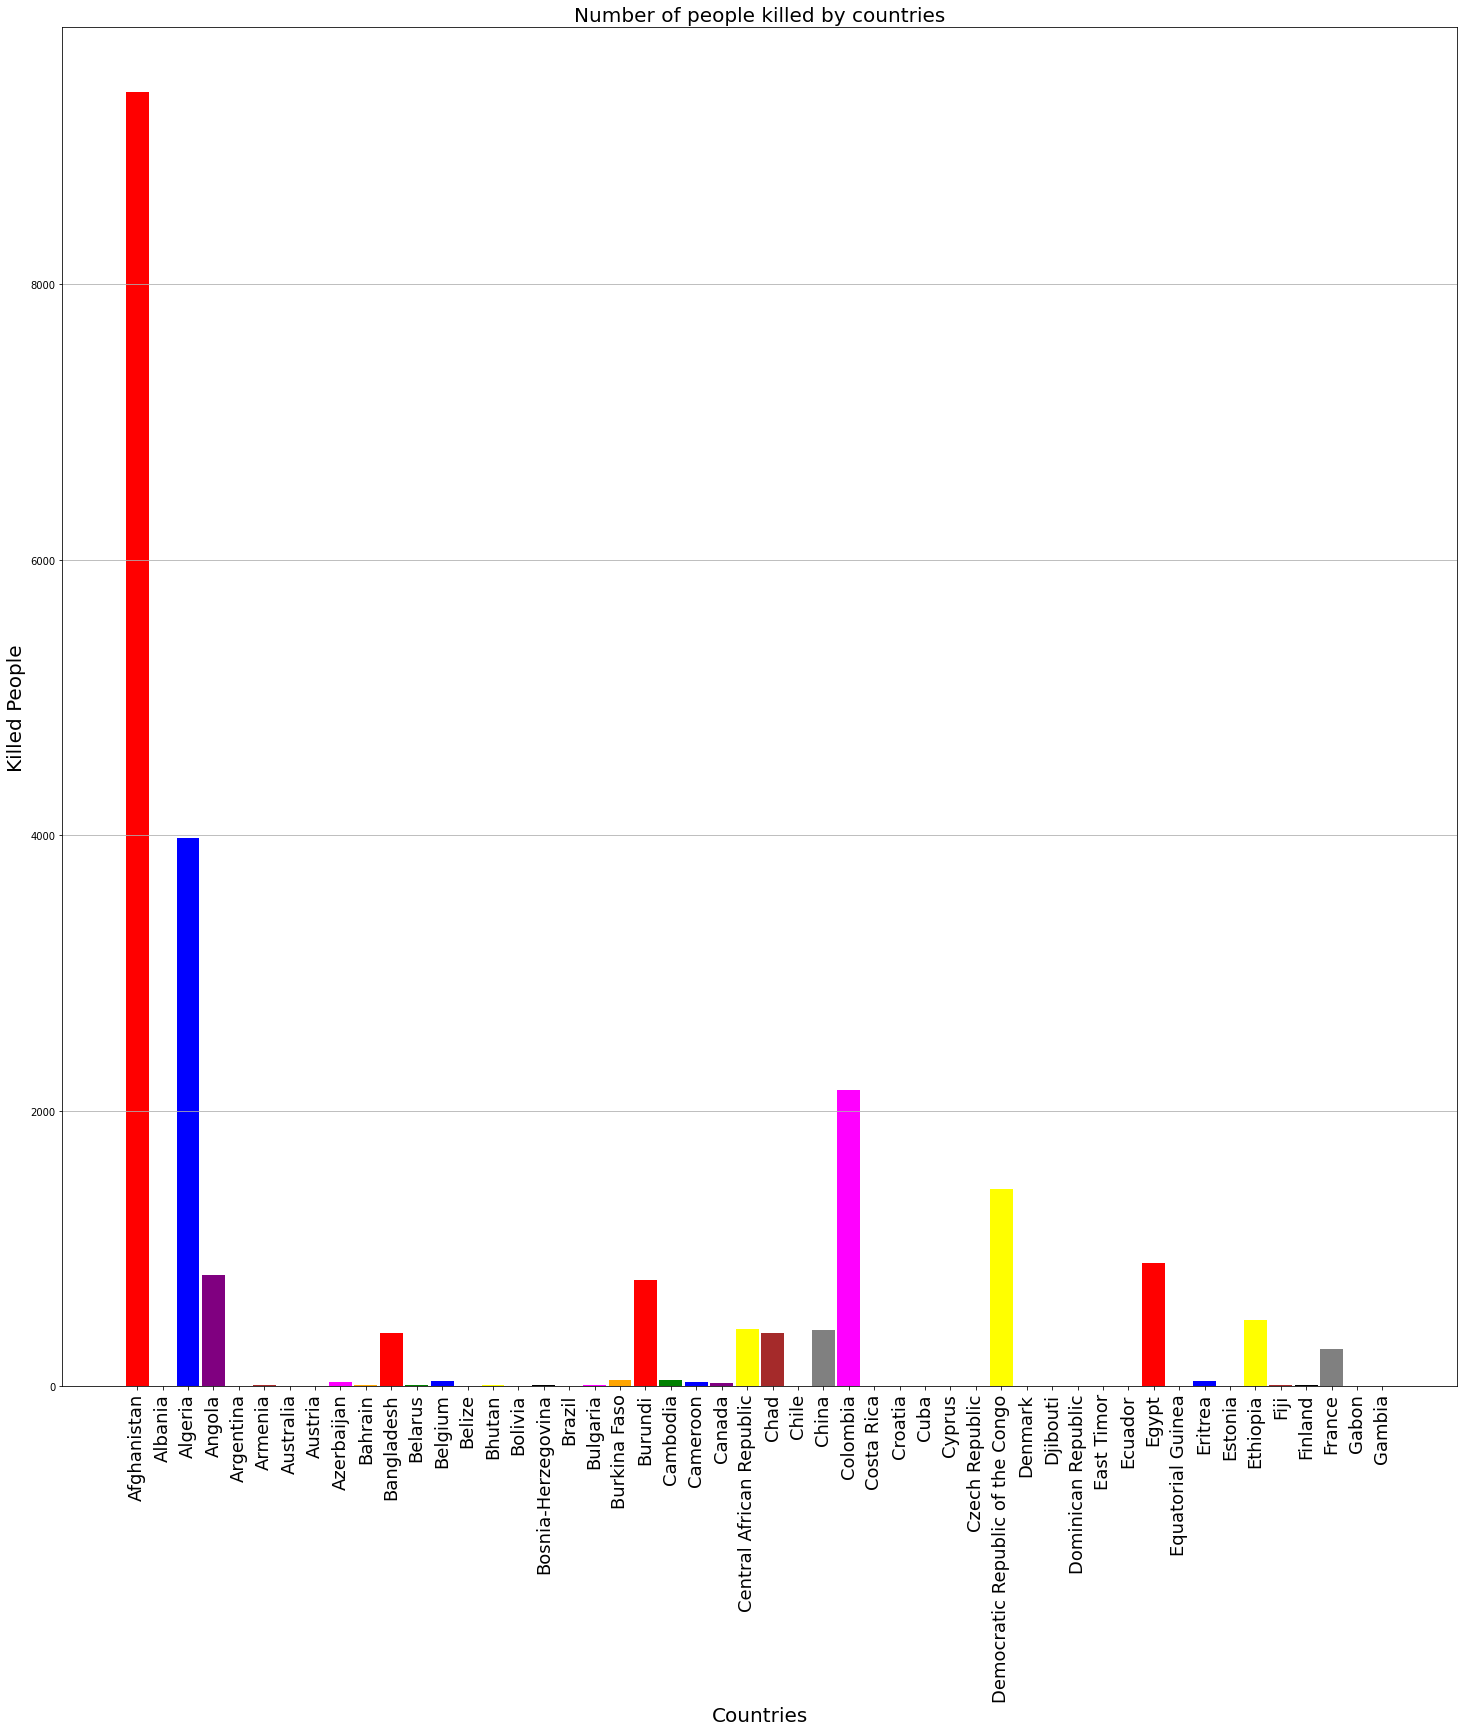

In [61]:
labels = countryKillFormatData.columns.tolist()
labels = labels[:50] #50 bar is easier to view at once
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[:50]
values = [int(i[0]) for i in values] # convert float to int
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange'] # color list for bar chart bar color 
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
# print(fig_size)
plt.show()

Afghanistan,Algeria,Colombia has most of the attacks compared to others

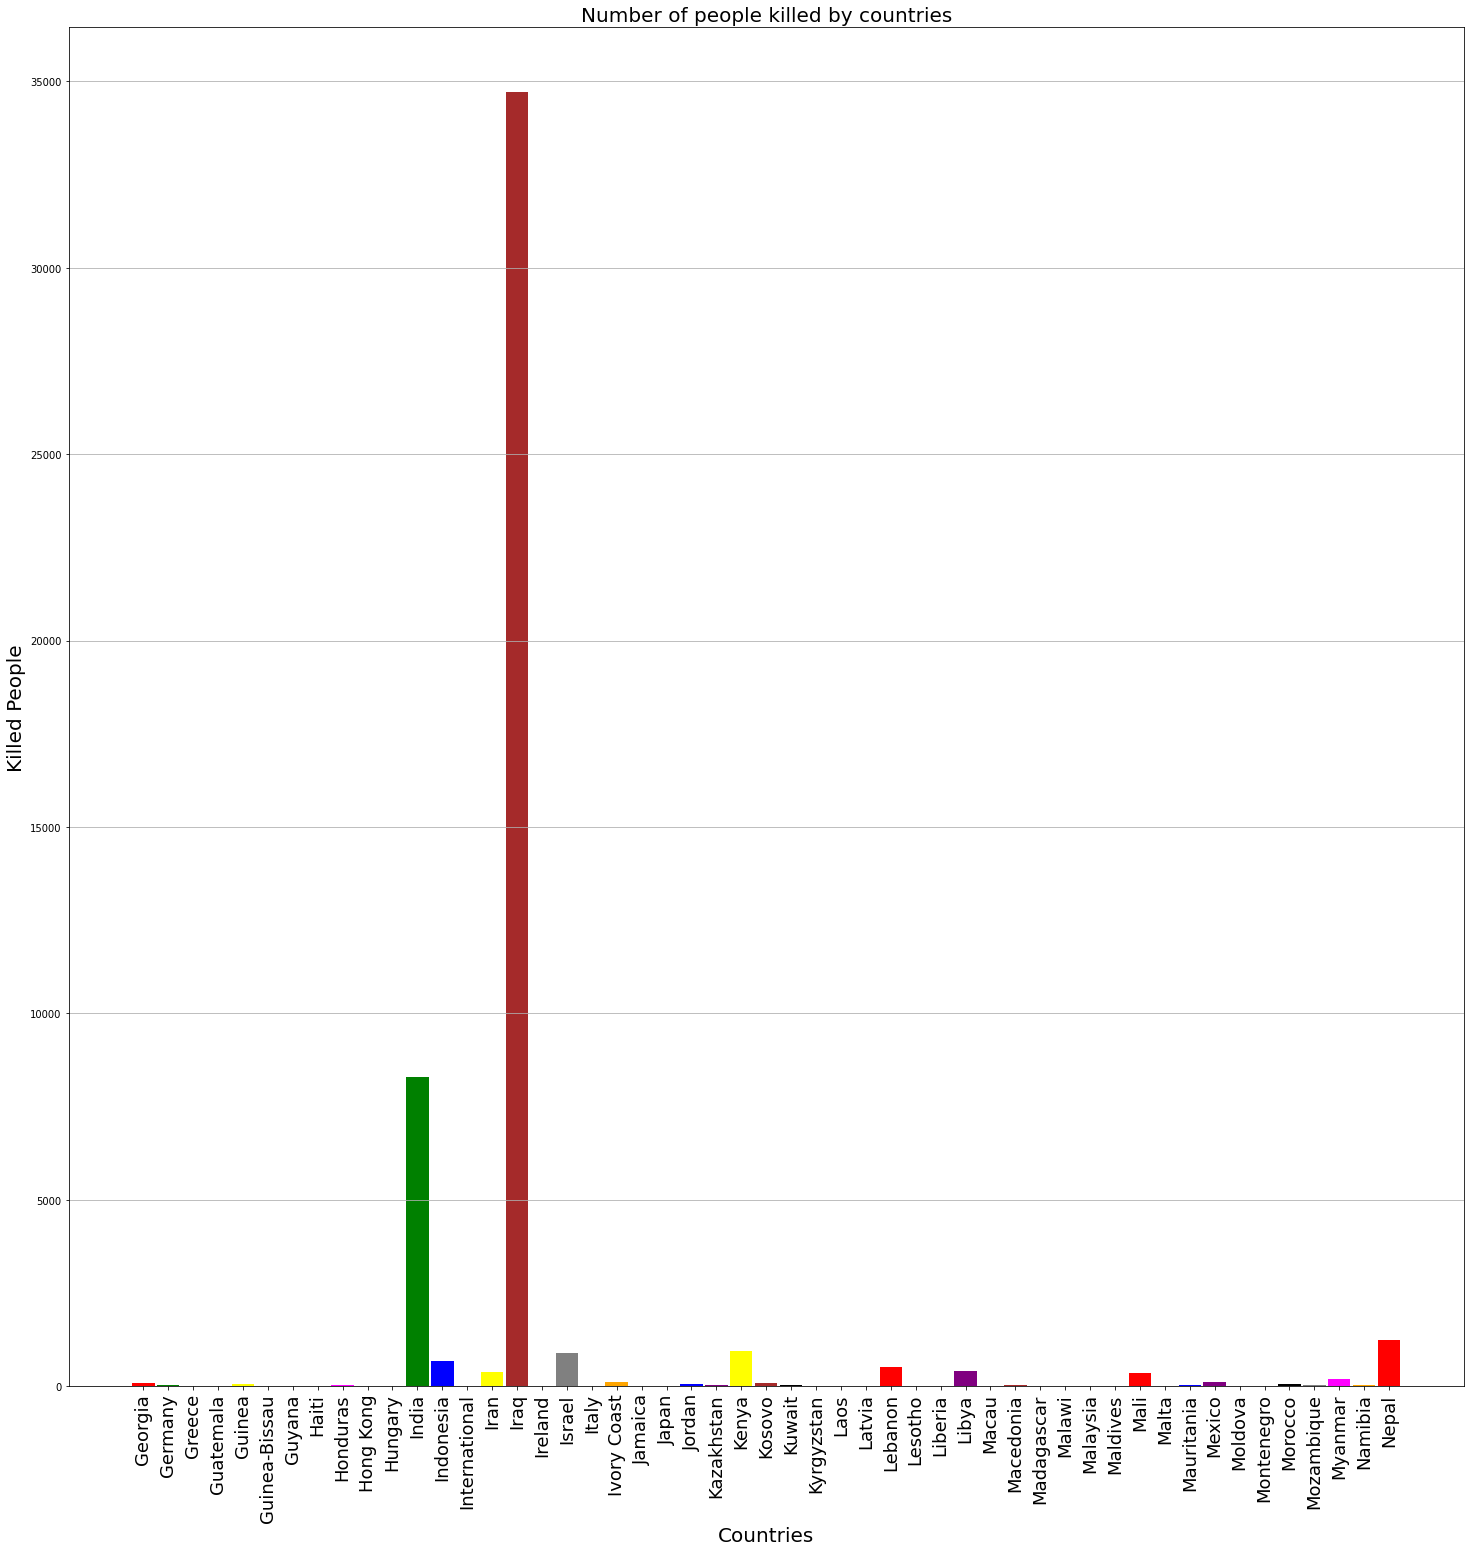

In [69]:
labels = countryKillFormatData.columns.tolist()
labels = labels[50:101]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[50:101]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=20
fig_size[1]=20
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

Iraq,India has most of the attacks compared to others

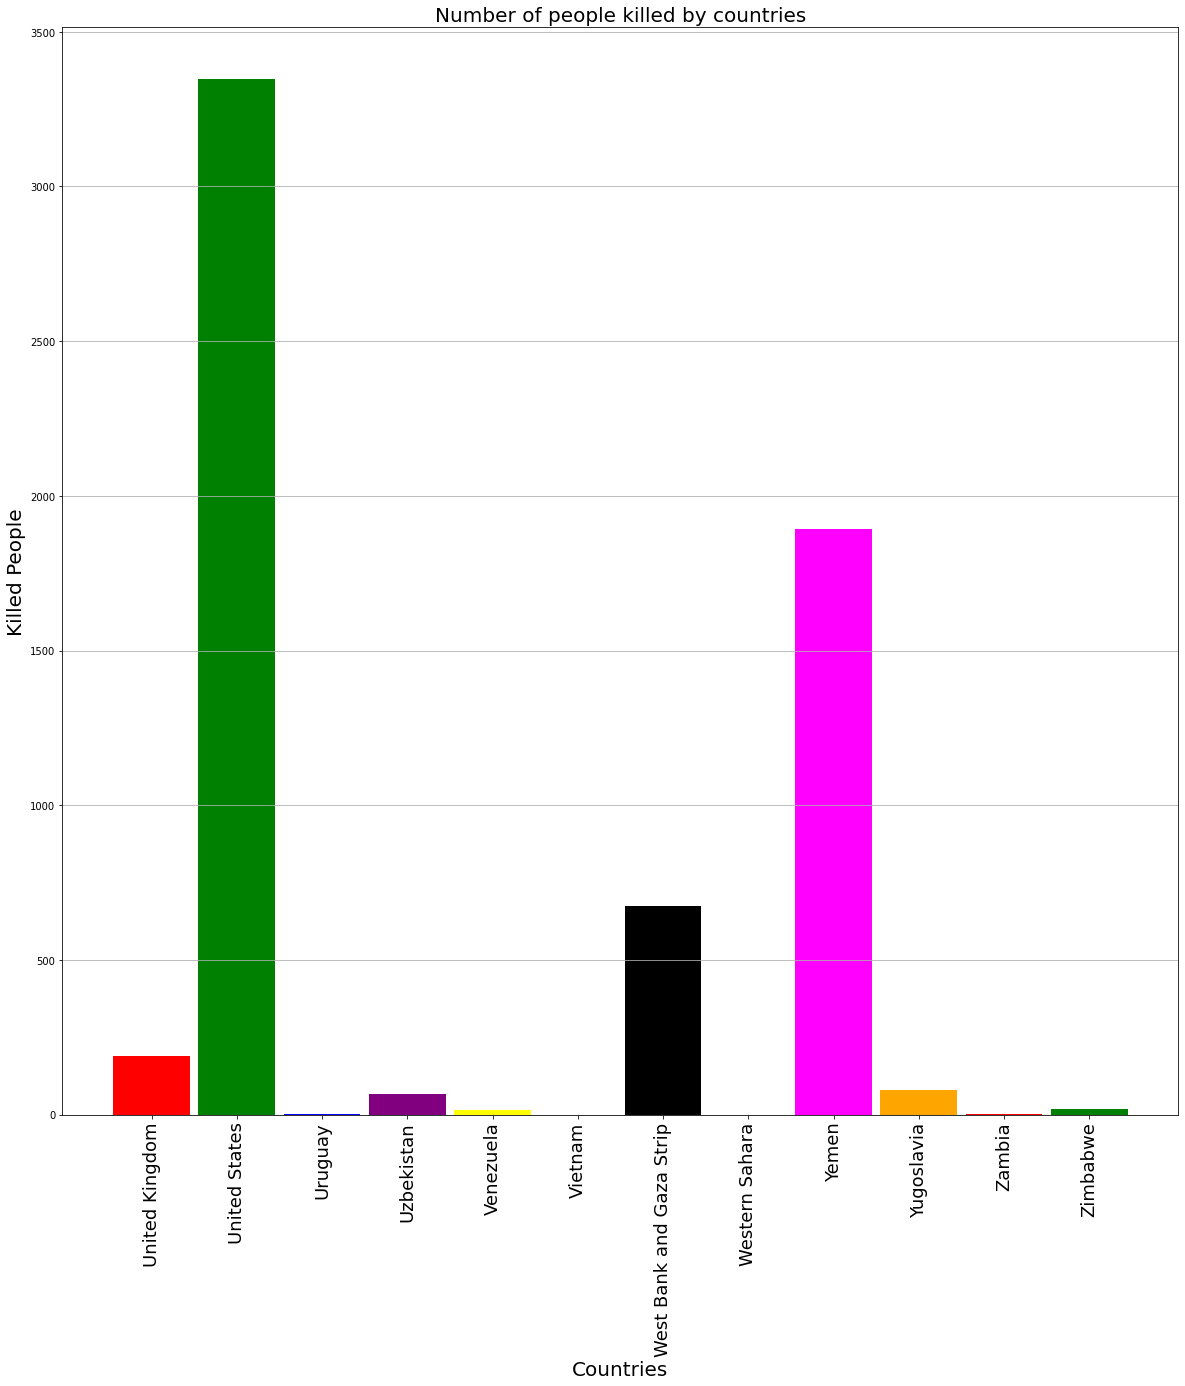

In [70]:
labels = countryKillFormatData.columns.tolist()
labels = labels[152:165]
index = np.arange(len(labels))
transpoze = countryKillFormatData.T
values = transpoze.values.tolist()
values = values[152:206]
values = [int(i[0]) for i in values]
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'brown', 'black', 'gray', 'magenta', 'orange']
fig, ax = plt.subplots(1, 1)
ax.yaxis.grid(True)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size
plt.bar(index, values, color = colors, width = 0.9)
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.xticks(index, labels, fontsize=18, rotation=90)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()

United States, Yemen has most of the attacks compared to others

## **Observations**

*   Hot zones of terrorism is in some parts of America , Africa and in the middle east so
*   United States, Iraq, Afganistan and Pakistan most suffered countries
*   Terrorists are likely to use attack types bombing/explosion , armed attack


# ***By: Komal Reddy K***